In [9]:
import pandas as pd


df = pd.read_csv('cleaned_dataset.csv')
import pandas as pd

df['locality'] = df['locality'].str.title()



In [ ]:
import matplotlib.pyplot as plt
'''
# Calculate IQR
Q1 = df['price'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['price'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                    # Interquartile range

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
non_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))

# Non-outliers in blue
plt.scatter(non_outliers.index, non_outliers['price'], alpha=0.6, c='blue', label='Non-Outliers')

# Outliers in red
plt.scatter(outliers.index, outliers['price'], alpha=0.6, c='red', label='Outliers')

# Add labels, title, and legend
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='purple', linestyle='--', label='Lower Bound')
plt.xlabel('Index (Property)')
plt.ylabel('Price (€)')
plt.title('Outliers in Property Prices')
plt.legend()
plt.grid(alpha=0.3)

plt.show()
'''

In [127]:
#Printing df informations
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16111 entries, 0 to 16112
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_index           16111 non-null  int64  
 1   bedrooms              16111 non-null  int64  
 2   property_type         16111 non-null  object 
 3   property_subtype      16111 non-null  object 
 4   locality              16111 non-null  object 
 5   postal_code           16111 non-null  int64  
 6   street                15697 non-null  object 
 7   number                15596 non-null  object 
 8   box                   5027 non-null   object 
 9   kitchen               16111 non-null  int64  
 10  facades               11576 non-null  float64
 11  price                 16110 non-null  float64
 12  furnished             16111 non-null  int64  
 13  terrace               16111 non-null  int64  
 14  terraceSurface        11339 non-null  float64
 15  fireplace             16

In [ ]:
'''
#Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'{len(df) - len(df_without_outliers)} rows have been removed from the {column} column')
    return df_without_outliers
df_without_outliers = remove_outliers(df, 'price')
df_without_outliers = remove_outliers(df_without_outliers, 'livingArea')


df = df_without_outliers
'''

0 rows have been removed from the price column
0 rows have been removed from the livingArea column


In [175]:
#Creating province columns
df = df[df['postal_code'].str.isnumeric()]
df['postal_code'] = df['postal_code'].astype('int64')
df['province'] = 'undefined'

for index, row in df.iterrows():
    if 1000 <= row['postal_code'] <= 1299:
        df.at[index, 'province'] = 'Brussels'
    if 1300 <= row['postal_code'] <= 1499:
        df.at[index, 'province'] = 'Walloon Brabant'
    if 1500 <= row['postal_code'] <= 1999:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 2000 <= row['postal_code'] <= 2999:
        df.at[index, 'province'] = 'Antwerp'
    if 3000 <= row['postal_code'] <= 3499:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 3500 <= row['postal_code'] <= 3999:
        df.at[index, 'province'] = 'Limburg'
    if 4000 <= row['postal_code'] <= 4999:
        df.at[index, 'province'] = 'Liege'
    if 5000 <= row['postal_code'] <= 5999:
        df.at[index, 'province'] = 'Namur'
    if 6000 <= row['postal_code'] <= 6599:
        df.at[index, 'province'] = 'Hainaut'
    if 6600 <= row['postal_code'] <= 6999:
        df.at[index, 'province'] = 'Luxembourg'
    if 7000 <= row['postal_code'] <= 7999:
        df.at[index, 'province'] = 'Hainaut'
    if 8000 <= row['postal_code'] <= 8999:
        df.at[index, 'province'] = 'West Flanders'
    if 9000 <= row['postal_code'] <= 9999:
        df.at[index, 'province'] = 'East Flanders'

In [176]:
#Creating new binary columns for subtype of property and buildingstate
df['APARTMENT_BLOCK'] = (df['property_subtype'] == 'APARTMENT_BLOCK').astype(int)
df['GROUND_FLOOR'] = (df['property_subtype'] == 'GROUND_FLOOR').astype(int)
df['COUNTRY_COTTAGE'] = (df['property_subtype'] == 'COUNTRY_COTTAGE').astype(int)
df['MANSION'] = (df['property_subtype'] == 'MANSION').astype(int)
df['PENTHOUSE'] = (df['property_subtype'] == 'PENTHOUSE').astype(int)
df['EXCEPTIONAL_PROPERTY'] = (df['property_subtype'] == 'EXCEPTIONAL_PROPERTY').astype(int)
df['KOT'] = (df['property_subtype'] == 'KOT').astype(int)
df['LOFT'] = (df['property_subtype'] == 'LOFT').astype(int)
df['MANOR_HOUSE'] = (df['property_subtype'] == 'MANOR_HOUSE').astype(int)
df['SERVICE_FLAT'] = (df['property_subtype'] == 'SERVICE_FLAT').astype(int)
df['CHALET'] = (df['property_subtype'] == 'CHALET').astype(int)


df['AS_NEW'] = (df['buildingState'] == 'AS_NEW').astype(int)
df['GOOD'] = (df['buildingState'] == 'GOOD').astype(int)
df['JUST_RENOVATED'] = (df['buildingState'] == 'JUST_RENOVATED').astype(int)
df['TO_BE_DONE_UP'] = (df['buildingState'] == 'TO_BE_DONE_UP').astype(int)
df['TO_RENOVATE'] = (df['buildingState'] == 'TO_RENOVATE').astype(int)
df['TO_RESTORE'] = (df['buildingState'] == 'TO_RESTORE').astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16111 entries, 0 to 16112
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_index           16111 non-null  int64  
 1   bedrooms              16111 non-null  int64  
 2   property_type         16111 non-null  object 
 3   property_subtype      16111 non-null  object 
 4   locality              16111 non-null  object 
 5   postal_code           16111 non-null  int64  
 6   street                15697 non-null  object 
 7   number                15596 non-null  object 
 8   box                   5027 non-null   object 
 9   kitchen               16111 non-null  int64  
 10  facades               11576 non-null  float64
 11  price                 16110 non-null  float64
 12  furnished             16111 non-null  int64  
 13  terrace               16111 non-null  int64  
 14  terraceSurface        11339 non-null  float64
 15  fireplace             16

average % of missing values in price column is 0.006206939358202471
average % of missing values in bedrooms column is 0.0
average % of missing values in property_type column is 0.0
average % of missing values in property_subtype column is 0.0
average % of missing values in locality column is 0.0
average % of missing values in postal_code column is 0.0
average % of missing values in street column is 2.569672894295823
average % of missing values in kitchen column is 0.0
average % of missing values in facades column is 28.148469989448206
average % of missing values in furnished column is 0.0
average % of missing values in terrace column is 0.0
average % of missing values in terraceSurface column is 29.61951461734219
average % of missing values in fireplace column is 0.0
average % of missing values in fireplaceCount column is 0.0
average % of missing values in buildingState column is 16.90149587238533
average % of missing values in garden column is 0.0
average % of missing values in garden

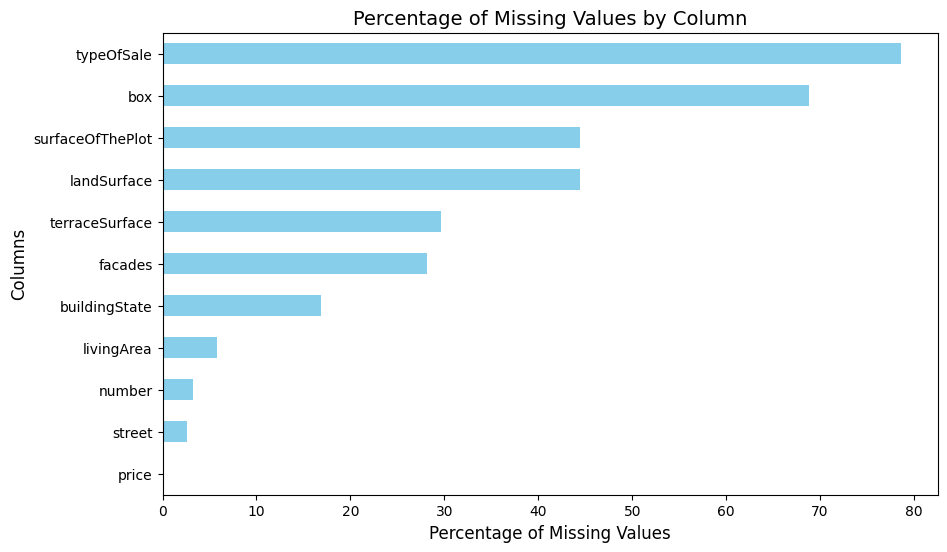

In [177]:
#Average % of missing values per column
import matplotlib.pyplot as plt
def avg_missing_values(df, column):
    print(f'average % of missing values in {column} column is {(df[column].isna().sum() / len(df[column])) * 100}')
    return (df[column].isna().sum() / len(df[column])) * 100
avg_missing_values(df, 'price')
avg_missing_values(df, 'bedrooms')
avg_missing_values(df, 'property_type')
avg_missing_values(df, 'property_subtype')
avg_missing_values(df, 'locality')
avg_missing_values(df, 'postal_code')
avg_missing_values(df, 'street')
avg_missing_values(df, 'kitchen')
avg_missing_values(df, 'facades')
avg_missing_values(df, 'furnished')
avg_missing_values(df, 'terrace')
avg_missing_values(df, 'terraceSurface')
avg_missing_values(df, 'fireplace')
avg_missing_values(df, 'fireplaceCount')
avg_missing_values(df, 'buildingState')
avg_missing_values(df, 'garden')
avg_missing_values(df, 'gardenSurface')
avg_missing_values(df, 'pool')
avg_missing_values(df, 'landSurface')
avg_missing_values(df, 'livingArea')


missing_percent = df.isna().mean() * 100

missing_percent = missing_percent[missing_percent > 0]


plt.figure(figsize=(10, 6))
missing_percent.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column', fontsize=14)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()

In [178]:
#Checking correlation with price
df_numeric = df.select_dtypes(include=['float64', 'int64']) 

correlation_matrix = df_numeric.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

price                   1.000000
livingArea              0.434224
landSurface             0.345216
surfaceOfThePlot        0.345216
bedrooms                0.344203
pool                    0.245355
facades                 0.206042
AS_NEW                  0.178521
EXCEPTIONAL_PROPERTY    0.117700
fireplace               0.109411
house_index             0.098941
gardenSurface           0.078730
terraceSurface          0.073806
PENTHOUSE               0.059093
terrace                 0.057193
APARTMENT_BLOCK         0.055346
COUNTRY_COTTAGE         0.054641
MANOR_HOUSE             0.048812
postal_code             0.032950
JUST_RENOVATED          0.032287
garden                  0.031216
MANSION                 0.016975
LOFT                    0.013539
furnished               0.003538
fireplaceCount          0.003210
TO_RESTORE             -0.017266
CHALET                 -0.022325
kitchen                -0.030797
KOT                    -0.032557
SERVICE_FLAT           -0.035264
GOOD      

object
object
Index(['Join_Count', 'nouveau_PO', 'FREQUENCY', 'CP_speciau', 'Shape_Leng',
       'Shape_Area', 'geometry', 'postal_code', 'price', 'livingArea'],
      dtype='object')


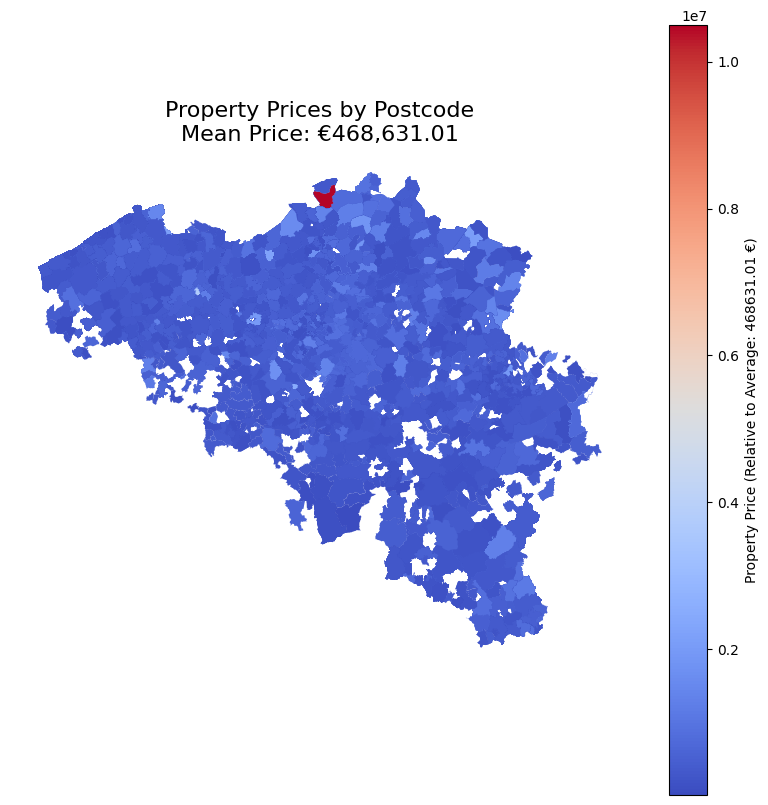

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file("postaldistricts.shp")
# Check data types for 'postal_code' in df and 'nouveau_PO' in gdf
print(df['postal_code'].dtype)  # Check type in df
print(gdf['nouveau_PO'].dtype)  # Check type in gdf

df['postal_code'] = df['postal_code'].astype(str)
gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(str)

gdf = gdf.merge(df[['postal_code', 'price', 'livingArea']], 
                 left_on='nouveau_PO', 
                 right_on='postal_code', 
                 how='left')
# Calculate the average price after filtering out outliers (assuming you've filtered outliers in 'average_price_filtered')
average_price_filtered = gdf['price'].mean()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {average_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property Prices by Postcode\nMean Price: €{average_price_filtered:,.2f}", fontsize=16)
plt.axis('off')

print(gdf.columns)


(np.float64(8763.493630001693),
 np.float64(299782.5311700009),
 np.float64(10018.970644998364),
 np.float64(255170.46085500065))

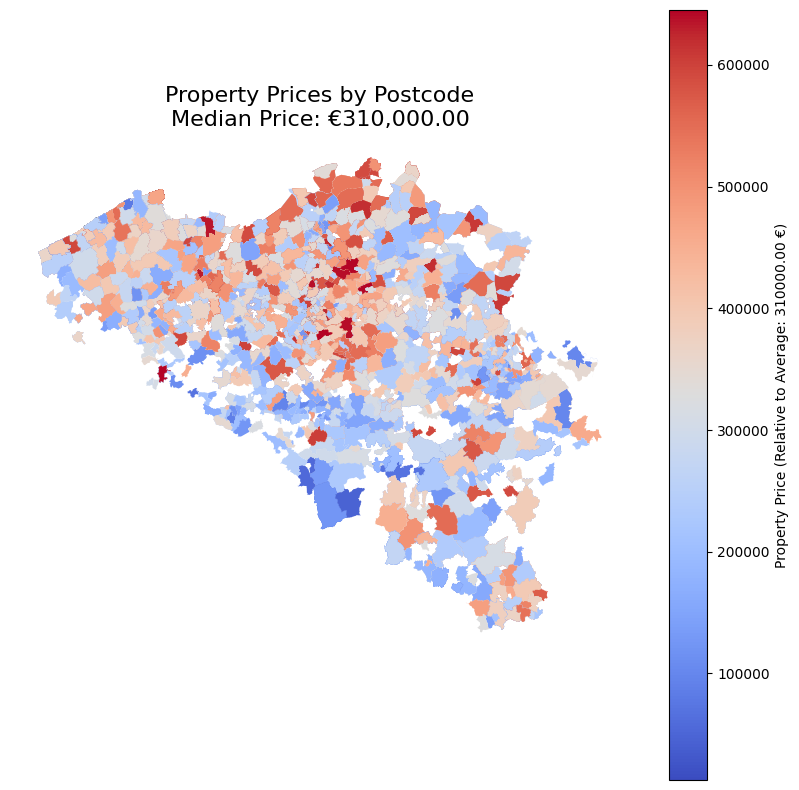

In [76]:
average_price_filtered_median = gdf['price'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {average_price_filtered_median:.2f} €)"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property Prices by Postcode\nMedian Price: €{average_price_filtered_median:,.2f}", fontsize=16)
plt.axis('off')

(np.float64(8763.493630001693),
 np.float64(299782.5311700009),
 np.float64(10018.970644998364),
 np.float64(255170.46085500065))

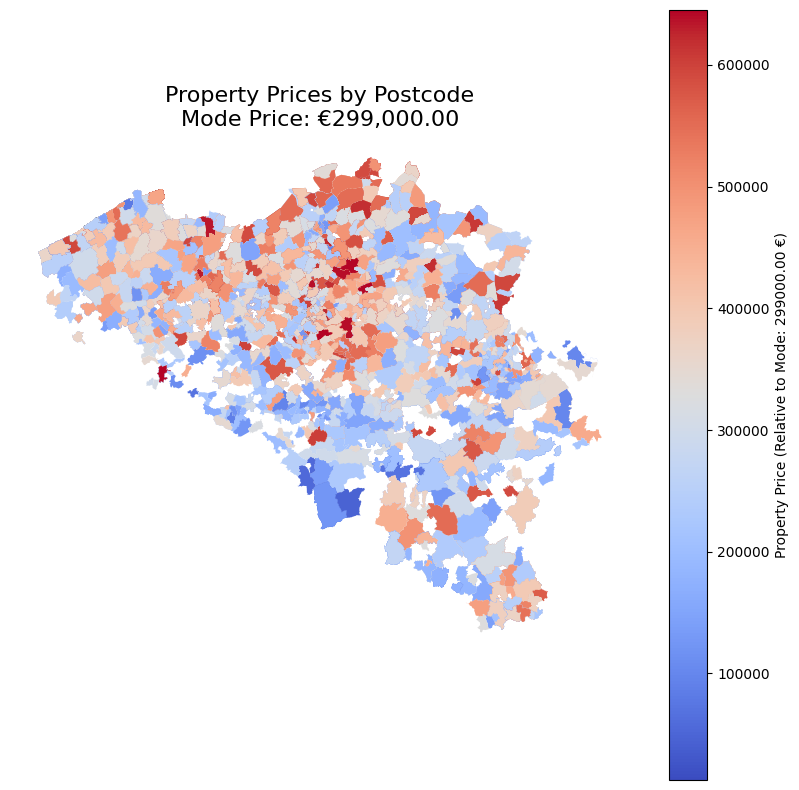

In [77]:
average_price_filtered_mode = gdf['price'].mode()[0]

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Mode: {average_price_filtered_mode:.2f} €)"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property Prices by Postcode\nMode Price: €{average_price_filtered_mode:,.2f}", fontsize=16)
plt.axis('off')

(np.float64(8763.493630001693),
 np.float64(299782.5311700009),
 np.float64(10018.970644998364),
 np.float64(255170.46085500065))

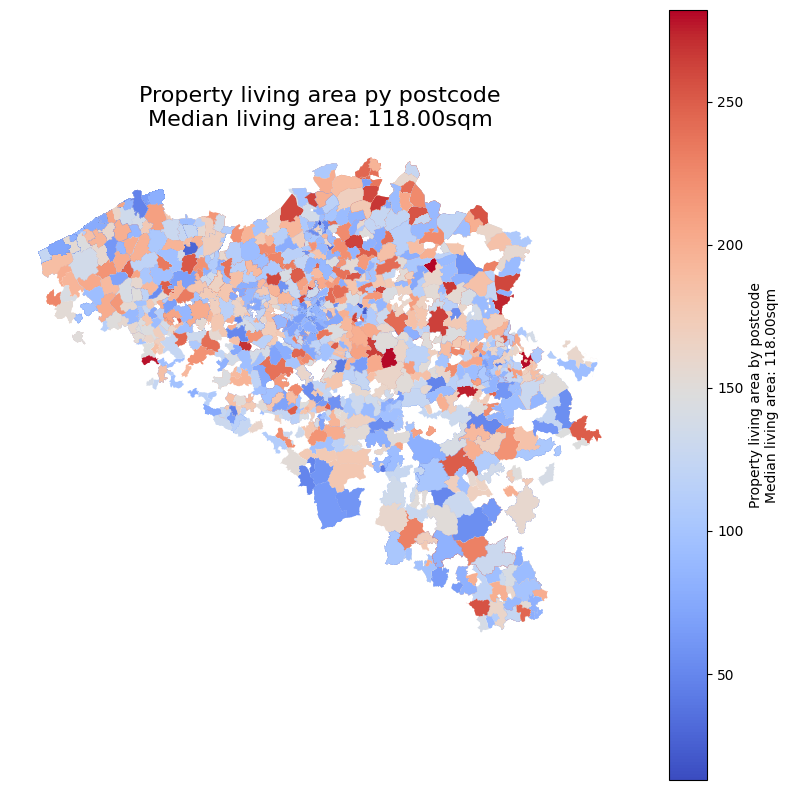

In [105]:
average_livingarea_filtered_median = gdf['livingArea'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='livingArea', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property living area by postcode\nMedian living area: {average_livingarea_filtered_median:,.2f}sqm"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property living area py postcode\nMedian living area: {average_livingarea_filtered_median:,.2f}sqm", fontsize=16)
plt.axis('off')

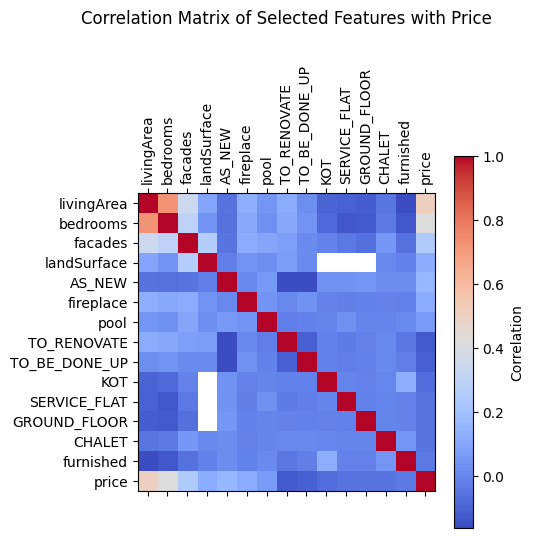

In [100]:
selected_columns = ['livingArea', 'bedrooms', 'facades', 'landSurface', 'AS_NEW', 'fireplace', 'pool', 'TO_RENOVATE', 'TO_BE_DONE_UP', 'KOT', 'SERVICE_FLAT', 'GROUND_FLOOR', 'CHALET', 'furnished']
correlation_matrix = df[selected_columns + ['price']].corr()
sorted_correlation = correlation_matrix['price'].sort_values(ascending=False)

plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Selected Features with Price', pad=30)

# Update tick labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

In [ ]:
#Plot outliers


In [11]:
#Price per SQM:
df['price_sqm']=df['price']/df['livingArea']


In [21]:
import csv

# Initialize an empty dictionary
my_dict = {}

# Open your CSV file
with open('postcode_municipality.csv', mode='r') as file:
    reader = csv.reader(file)
    
    # Skip the header row (if present)
    next(reader)
    
    # Iterate over the rows and add them to the dictionary
    for row in reader:
        my_dict[row[0]] = row[1]

# Print the dictionary
print(my_dict)
df['municipality_code'] = df['postal_code'].map(my_dict)
print(df)

{'5571': '91013', '5080': '92141', '5543': '91142', '3581': '71004', '3583': '71004', '3590': '71011', '3640': '72018', '3717': '73028', '3891': '71017', '3980': '71057', '8553': '34042', '6870': '84059', '7504': '57081', '7822': '51004', '1401': '25072', '1460': '25044', '2640': '11029', '2382': '13035', '2310': '13037', '2547': '11025', '2845': '11030', '2060': '11002', '2627': '11038', '2381': '13035', '2150': '11007', '2387': '13002', '3472': '24054', '3272': '24134', '3212': '24066', '1640': '23101', '3450': '24028', '1540': '23032', '9473': '41011', '9112': '46021', '9031': '44021', '9308': '41002', '4730': '63061', '4632': '62099', '4351': '64063', '4480': '61080', '4910': '63076', '7510': '57081', '7020': '53053', '6534': '56078', '7860': '51069', '7330': '53070', '7864': '51069', '7100': '58001', '6531': '56078', '3722': '73040', '8550': '34042', '8691': '38002', '8700': '37015', '8760': '37007', '6840': '84043', '6983': '83031', '6987': '83044', '3120': '24109', '1541': '2303

In [26]:
# Sort the DataFrame by price_sqm in descending order and get the top 5 unique localities
top_5_postcodes = df.sort_values('price_sqm', ascending=False).groupby('municipality_code').head(1).head(20)

# Print the localities and corresponding price_sqm
print(top_5_postcodes[['municipality_code', 'price_sqm', 'locality', 'postal_code']])


      municipality_code     price_sqm                    locality postal_code
9345              31043  39500.000000                Knokke-Zoute        8300
12084             21018  15961.538462        Woluwe-Saint-Lambert        1200
13853             11022  14570.552147                   Kalmthout        2920
14567             11002  13333.333333                   Antwerpen        2000
12559             31040  13112.244898                      Knokke        8211
1168              24062  12941.176471                      Leuven        3000
13757             38014  12434.210526               Oostduinkerke        8670
2851              44021  10869.565217                     Drongen        9031
13191             35013  10694.444444                    Oostende        8400
10347             38016  10597.826087                  Nieuwpoort        8620
11931             83012  10454.545455                      Durbuy        6940
2074              35029  10454.545455                     De Haa